#Lab Assignment - 3
**2023-CS543 Reinforcement Learning Lab.** \\
Instructor : Shashi Shekhar Jha (shashi@iitrpr.ac.in)

**Due on 22-04-2023    2400 Hrs   (100 Marks)**

**Submission Instructions**:
All submissions are through google classroom, upload a single colab notebook with .ipynb extension. Go to file->Download-> Download .ipynb in colab to download the file. 

In case you face any trouble with the submission, please contact the TA:

Shivam Kainth, 2020csz0006@iitrpr.ac.in



Your submission must be your original work. Do not indulge in any kind of plagiarism or copying. Abide by the honour and integrity code to do your assignment.


Late submissions will attract penalties.

**Penalty Policy**: There will be a penalty of 5% for every 24 Hr delay in the submission. E.g. For the 1st 24 Hr delay the penalty will be 5%, for submission with a delay of >24 Hr and < 48 Hr, the penalty will be 10% and so on.


**Naming Instructions**:
Name the colab file submission as follows: \<YourName>_\<rollnumber>_Lab3.ipynb 

E.g. if your name is ABC, roll number is 2022csx1234 and submission is for lab3 then you should name the colab file as: ABC_2022csx1234_lab3.ipynb


## HIghway Environment
https://highway-env.readthedocs.io/en/latest/index.html

This library provides various environments which help in decision-making while doing Autonomous Driving. This library contains multiple environments which simulates various driving situations like Parking, Intersection manuvaering, Highway driving, Roundabouts etc. 


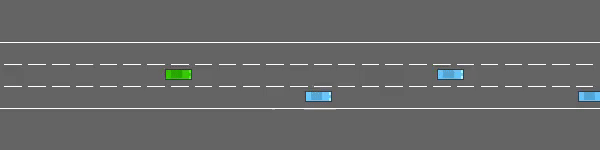

### Actions


For Highway Environments, **we have 3 tyoes of actions sets**:
1. **Countinuous Actions:**
The ContinuousAction type allows the agent to directly set the low-level controls of the vehicle kinematics, namely the throttle 
 and steering angle.
 a Separate config is there, to enable or disable Lat/Long based movements.
 More details here: https://highway-env.readthedocs.io/en/latest/actions/index.html

 This setup is not suitable for Q-value based methods such as DQN.

2. **Discrete Actions**
In this setting, a uniform quantization is done for the countinuous values. The step size is decided by *actions_per_axis* config option.
3. **Discrete Meta Actions**
In this settng, we have a total of 5 Actions, namely:  
        0: 'LANE_LEFT',
        1: 'IDLE',
        2: 'LANE_RIGHT',
        3: 'FASTER',
        4: 'SLOWER'
    
This helps in selecting an action while working with Q-value based methods.
These are abstractions over the countinuous actions and are most suitable for the Questions at hand.


### States

For all environments, several types of observations can be used. They are defined in the observation module. Each environment comes with a default observation, which can be changed or customised using environment configurations. 


---



```
   from matplotlib import pyplot as plt
   %matplotlib inline
config = {
       "observation": {
           "type": "GrayscaleObservation",
           "observation_shape": (128, 64),
           "stack_size": 4,
           "weights": [0.2989, 0.5870, 0.1140],  # weights for RGB conversion
           "scaling": 1.75,
       },
       "policy_frequency": 2
   }
   env.configure(config)
   obs, info = env.reset()

   fig, axes = plt.subplots(ncols=4, figsize=(12, 5))
   for i, ax in enumerate(axes.flat):
       ax.imshow(obs[i, ...].T, cmap=plt.get_cmap('gray'))
   plt.show()
```



---
We have a total of 4 observation types: Greyscaleimage, occupancygrid, timetocollision, Kinemtics. 
https://highway-env.readthedocs.io/en/latest/observations/index.html


### Rewards
Thus, the reward function is often composed of a velocity term and a collision term:

 
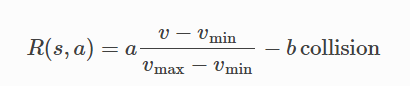
where v, vmin, vmax are the current, minimum and maximum speed of the ego-vehicle respectively.

In parking environment, the goal settings are  a bit different. More details can be found here. 
https://highway-env.readthedocs.io/en/latest/rewards/index.html

In [ ]:
!pip install highway-env

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.8/103.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 32.7 MB/s eta 0:00:00


In [ ]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Intersection Environment
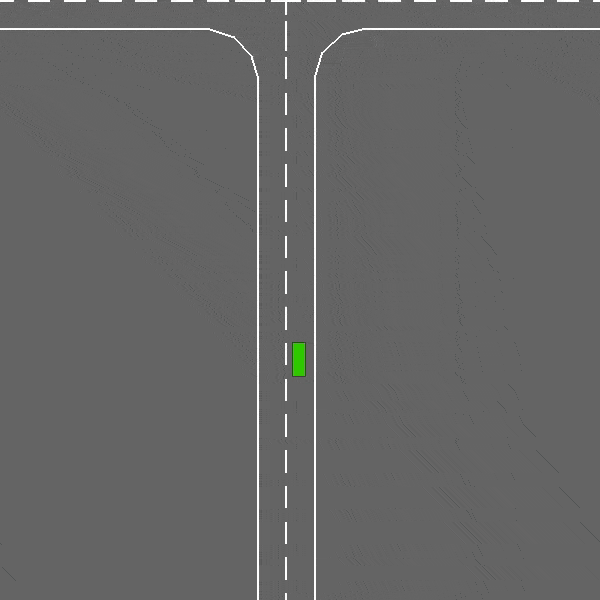

https://highway-env.readthedocs.io/en/latest/environments/intersection.html
An intersection scenario with dense traffic, Green is the agent, which needs to cross the intersection when the road is clear




Default configuration  for interaction environment

```
{
    "observation": {
        "type": "Kinematics",
        "vehicles_count": 15,
        "features": ["presence", "x", "y", "vx", "vy", "cos_h", "sin_h"],
        "features_range": {
            "x": [-100, 100],
            "y": [-100, 100],
            "vx": [-20, 20],
            "vy": [-20, 20],
        },
        "absolute": True,
        "flatten": False,
        "observe_intentions": False
    },
    "action": {
        "type": "DiscreteMetaAction",
        "longitudinal": False,
        "lateral": True
    },
    "duration": 13,  # [s]
    "destination": "o1",
    "initial_vehicle_count": 10,
    "spawn_probability": 0.6,
    "screen_width": 600,
    "screen_height": 600,
    "centering_position": [0.5, 0.6],
    "scaling": 5.5 * 1.3,
    "collision_reward": IntersectionEnv.COLLISION_REWARD,
    "normalize_reward": False
}
```



### Question 1: 
A: Solve Intersection environment by Training 3 Algorithms DQN, DDQN, PER DQN for Intersection Environment. Plot the graphs for the average reward per episode, Average Q value and absolute value error. [40 Points]

For code of Algorithms, you can use prebuilt libraries such as StableBaselines3 and import algorithms as well as helper functions for graph visulization.

 Perform the training till convergence or 10000 episodes.

B: Evaluate the environment for 150 episodes and plot the above mentioned metrics[5 points]

C: Comment on the results of different algorithms for the task and the performance of these alogithms. Record the total time taken by these algorithms to train for 1000 episodes. [5 points]

### Highway Encironment
In this task, the ego-vehicle is driving on a multilane highway populated with other vehicles. The agent’s objective is to reach a high speed while avoiding collisions with neighbouring vehicles. Driving on the right side of the road is also rewarded.

https://highway-env.readthedocs.io/en/latest/environments/highway.html


env = gym.make("highway-v0")

For this task modify the configuration file to use Greyscale observations and discrete meta actions. Increast the number of lanes to 6. Use this link to get more details about configuraiton setup 
https://highway-env.readthedocs.io/en/latest/quickstart.html#configuring-an-environment


Example code for Highway Env with DQN. Refer library docs for more details about DQN Setup.  

##Install


In [ ]:
!pip install gymnasium
!pip install highway-env
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Libraries

##Q1

In [ ]:
import gymnasium as gym
import highway_env
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from collections import deque
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Reshape
from keras.models import Sequential
import random
import math
from operator import itemgetter
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
import time
# Set the random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

env = gym.make("intersection-v0")
env.reset()[0]
n_actions = env.action_space.n
n_states = env.observation_space.shape[0]

# Define the hyperparameters
epsilon_min_new = 0.01
epsilon_decay_new = 0.995
num_episodes_new = 100
batch_size_new = 32
gamma_new = 0.95
learning_rate = 0.001
memory_size_new = 10000
update_target_freq_new = 1000

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


In [ ]:
class DQNAgent:
    def __init__(self, env, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, learning_rate=0.001, batch_size=32, replay_memory_size=100000):
        self.env = env
        self.model = None
        self.episode_rewards = []
        self.epsilon_history = []
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.replay_memory_size = replay_memory_size
        self.replay_memory = []
        self.Q = {}
        self.average_q_values = []
        self.errors = []


    def get_model(self):
        return self.model

    def get_episode_rewards(self):
        return self.episode_rewards

    def get_epsilon_history(self):
        return self.epsilon_history

    def build_model(self):
        input_shape = self.env.observation_space.shape
        model = keras.Sequential([
            keras.layers.Dense(32, activation='relu', input_shape=input_shape),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.env.action_space.n, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(lr=self.learning_rate), loss='mse')
        return model

    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            hashable_array = tuple(tuple(row) for row in state)
            if(self.Q.get(hashable_array) == None):
                return 0
            else:
                values = [self.Q[(hashable_array, action)] for action in range(0,2)]
                return np.argmax(values)

    def replay(self):
        if len(self.replay_memory) > self.replay_memory_size:
            self.replay_memory.pop(0)
        
        batch = random.sample(self.replay_memory, min(len(self.replay_memory), self.batch_size))
        states_batch, actions_batch, rewards_batch, next_states_batch, done_batch = zip(*batch)

        q_targets_batch = []
        q_values_batch = [] # store Q values for each state-action pair in the batch
        errors_batch = [] # store absolute value error for each state-action pair in the batch
        for i in range(len(batch)):
            if done_batch[i]:
                q_targets_batch.append(rewards_batch[i])
            else:
                hashable_array = tuple(tuple(row) for row in next_states_batch[i])
                values = [self.Q.get((hashable_array, a), 0.0) for a in range(0,2)]
                q_targets_batch.append(rewards_batch[i] + self.discount_factor * max(values))
            

        for i in range(len(batch)):
            hashable_array = tuple(tuple(row) for row in states_batch[i])
            state_action_pair = (hashable_array, actions_batch[i])
            q_value = self.Q.get(state_action_pair, 0.0)
            q_target = q_targets_batch[i]
            error = q_value - q_target
            self.Q[state_action_pair] = q_value - self.learning_rate * error
            q_values_batch.append(self.Q.get(state_action_pair, 0.0))
        # calculate and store average Q value for the episode
        self.average_q_values.append(sum(q_values_batch) / len(q_values_batch))
    
    def train(self, num_episodes):
        self.average_q_values = [] # add a new list to store average Q value for each episode
        self.abs_errors=[]
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            done = False 
            episode_reward = 0.0
            state = tuple(state)
            while not done:
                action = self.select_action(state)
                next_state, reward, done,temp,_ = self.env.step(action)
                self.replay_memory.append((state, action, reward, next_state, done))
                self.replay()
                state = next_state
                episode_reward += reward
            
            self.episode_rewards.append(episode_reward)
            self.epsilon_history.append(self.epsilon)
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
            print("Episode {}: reward = {}, epsilon = {}".format(episode+1, episode_reward, self.epsilon))
       
            # calculate absolute value error
            abs_err = 0.0
            for state, action, reward, next_state, done in self.replay_memory:
                hashable_array = tuple(tuple(row) for row in state)
                state_action_pair = (hashable_array, action)
                q_value = self.Q.get(state_action_pair, 0.0)
                hashable_array = tuple(tuple(row) for row in next_state)
                values = [self.Q.get((hashable_array, a), 0.0) for a in range(0,2)]
                q_target = reward + self.discount_factor * max(values)
                abs_err += abs(q_value - q_target)
            self.abs_errors.append(abs_err / len(self.replay_memory)) # average absolute value error per replay memory entry

        return self.average_q_values, self.episode_rewards, self.epsilon_history,self.abs_errors

env = gym.make("intersection-v0")
start_time = time.time()
agent = DQNAgent(env)
average_q_values, episode_rewards, epsilon_history,error = agent.train(150)
dqn_time = time.time() - start_time


/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Episode 1: reward = 5.737799366346138, epsilon = 0.99
Episode 2: reward = -2.4390211851606125, epsilon = 0.9801
Episode 3: reward = 7.522791272693264, epsilon = 0.9702989999999999
Episode 4: reward = -3.0, epsilon = 0.96059601
Episode 5: reward = 6.6163432219928815, epsilon = 0.9509900498999999
Episode 6: reward = -5.0, epsilon = 0.9414801494009999
Episode 7: reward = 5.074898367898654, epsilon = 0.9320653479069899
Episode 8: reward = -4.382153320016807, epsilon = 0.92274469442792
Episode 9: reward = -4.0, epsilon = 0.9135172474836407
Episode 10: reward = -1.3187193862696738, epsilon = 0.9043820750088043
Episode 11: reward = -2.0, epsilon = 0.8953382542587163
Episode 12: reward = 4.077281614832333, epsilon = 0.8863848717161291
Episode 13: reward = -2.5266874688495378, epsilon = 0.8775210229989678
Episode 14: reward = -2.449886420742666, epsilon = 0.8687458127689781
Episode 15: reward = -2.0, epsilon = 0.8600583546412883
Episode 16: reward = 6.617507725567027, epsilon = 0.85145777109487

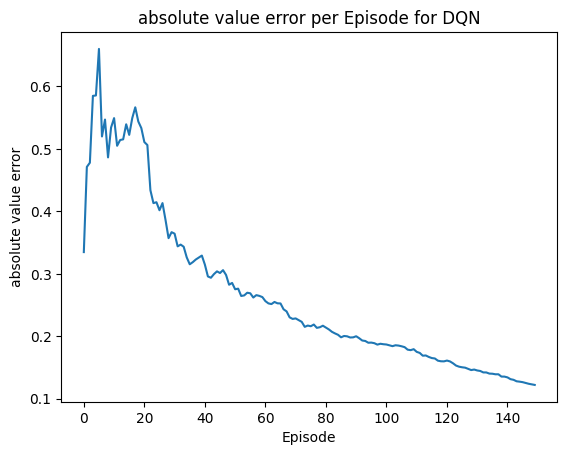

In [ ]:
 # plot for absolute error
plt.plot(error)
plt.xlabel('Episode')
plt.ylabel('absolute value error')
plt.title('absolute value error per Episode for DQN')
plt.show()

We can see that the absolute value error per episode for DQN is reducing and tends to converge as the number of episodes increase

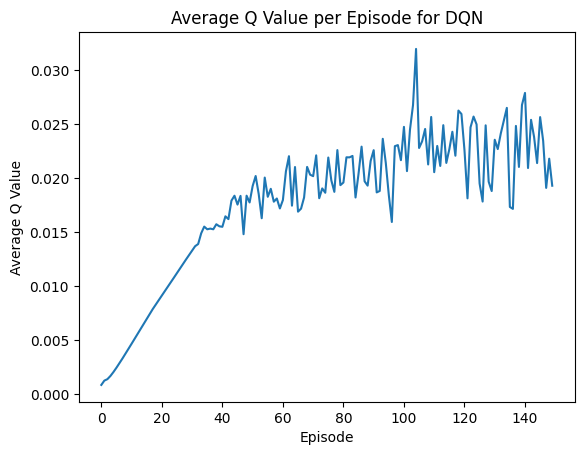

In [ ]:
 # plot average Q value
plt.plot(average_q_values[:150])
plt.xlabel('Episode')
plt.ylabel('Average Q Value')
plt.title('Average Q Value per Episode for DQN')
plt.show()

As the number of episodes in a DQN model increases, the average q value fluctuates rapidly but shows an overall increasing trend, suggesting that the model is learning and improving over time. The fluctuations indicate that the model is still exploring and trying to refine its predictions, but the increasing trend suggests that it is making progress in doing so.
The expression also suggests that the increasing trend in the average q value is likely to continue with larger numbers of episodes, as the model continues to learn from more situations and improve its predictions. The overall increase in the average q value indicates that the DQN model is becoming better at estimating the expected rewards for each action in a given state, which is a positive sign for its performance.

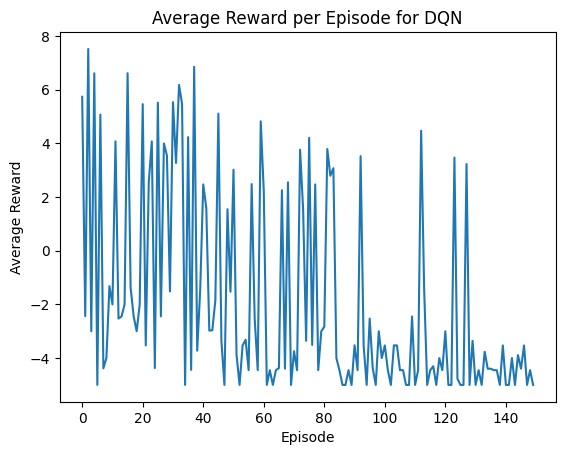

In [ ]:
# plot episode rewards
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for DQN')
plt.show()

Average reward is flucating a lot between -4 to 8 we cant deduce any meaningful info as number of episodes are low

In [ ]:
print("time took to run DQN for 150 episodes in Intersection-v0 environment is 37 minutes")

time took to run DQN for 150 episodes in Intersection-v0 environment is 37 minutes


In [ ]:
class DDQNAgent:
    def __init__(self, env, update_after=4, update_every=4,discount_factor=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, learning_rate=0.001, batch_size=32, replay_memory_size=100000):
        self.env = env
        self.update_after = update_after
        self.update_every = update_every
        self.model = None
        self.avg_reward_history = []
        self.avg_q_values_history = []
        self.abs_error_history = []
        self.episode_rewards=[]

        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.replay_memory_size = replay_memory_size
        self.replay_memory = []
        self.average_q_values = []
        self.errors = []
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
        self.memory = deque(maxlen=2000)
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.tau = 0.08
        self.Q = self._build_model()
        self.Q_target = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Reshape((15, 7), input_shape=(15, 7)))
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(env.action_space.n, activation='linear'))
        model.compile(optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate),loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            act=random.randrange(self.action_size)
        else:
            act_values = self.Q.predict(np.array(state))[0]
            act=np.argmax(act_values)
        return act

    def replay(self):
        if len(self.memory) < 32:
            return
        minibatch = random.sample(self.memory, 32)
        states_batch = np.array([item[0] for item in minibatch])
        actions_batch = np.array([item[1] for item in minibatch])
        rewards_batch = np.array([item[2] for item in minibatch])
        next_states_batch = np.array([item[3] for item in minibatch])
        done_batch = np.array([item[4] for item in minibatch])

        q_targets_batch = rewards_batch + self.discount_factor * np.max(self.Q_target.predict_on_batch(next_states_batch), axis=1) * (1 - done_batch)
        for i in range(len(minibatch)):
            state = states_batch[i]
            action = actions_batch[i]
            state=np.array(state).astype(np.float32)
            state = np.expand_dims(state, axis=0)  # add a new axis to create a batch of size 1
            state = tf.convert_to_tensor(state)
            #q_values = self.Q.predict(np.expand_dims(state, axis=0))[0]
            q_values = self.Q.predict(state)[0]
            q_value = q_values[action]
            self.average_q_values.append(np.mean(q_values))
            self.avg_q_values_history.append(np.mean(self.average_q_values[-100:]))
            q_target = q_targets_batch[i]
            error = q_value - q_target
            self.errors.append(abs(error))
            self.abs_error_history.append(np.mean(self.errors[-100:]))
            self.Q.predict(state)[0] -= self.learning_rate * error
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def target_train(self):
        weights = self.Q.get_weights()
        target_weights = self.Q_target.get_weights()
        for i in range(len(target_weights)):
            target_weights[i] = weights[i] * self.tau + target_weights[i] * (1 - self.tau)
        self.Q_target.set_weights(target_weights)

    def train(self, num_episodes):
        epsilon_history = []

        for episode in range(num_episodes):
            state = self.env.reset()[0]
            total_reward = 0.0
            done = False
            steps = 0
            while not done:
                action = self.act(state)
                next_state, reward, done, _ ,_= self.env.step(action)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
                steps += 1
                if steps >= self.update_after and steps % self.update_every == 0:
                    self.replay()
                self.episode_rewards.append(total_reward)
                avg_reward = np.mean(self.episode_rewards[-100:])
                self.avg_reward_history.append(avg_reward)

            epsilon_history.append(self.epsilon)
            print(f"Episode {episode+1}: reward = {total_reward:.2f}, epsilon = {self.epsilon:.2f}")
        return self.avg_reward_history,self.avg_q_values_history,self.abs_error_history
start_time = time.time()
env = gym.make("intersection-v0")
agent = DDQNAgent(env, update_after=5)
avg_reward_history,avg_q_values_history,abs_error_history = agent.train(10)
dqn_time = time.time() - start_time


/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


Episode 1: reward = 7.46, epsilon = 1.00
Episode 2: reward = 6.54, epsilon = 1.00
1/1 [==============================] - 0s 22ms/step
Episode 3: reward = 6.00, epsilon = 0.99
1/1 [==============================] - 0s 20ms/step
Episode 4: reward = 6.47, epsilon = 0.98
1/1 [==============================] - 0s 27ms/step
Episode 5: reward = 6.17, epsilon = 0.97
1/1 [==============================] - 0s 26ms/step
Episode 6: reward = 6.18, epsilon = 0.97
1/1 [==============================] - 0s 21ms/step
Episode 7: reward = 6.24, epsilon = 0.96
1/1 [==============================] - 0s 20ms/step
Episode 8: reward = -2.47, epsilon = 0.95
Episode 9: reward = -2.00, epsilon = 0.95
1/1 [==============================] - 0s 23ms/step
Episode 10: reward = 8.00, epsilon = 0.93


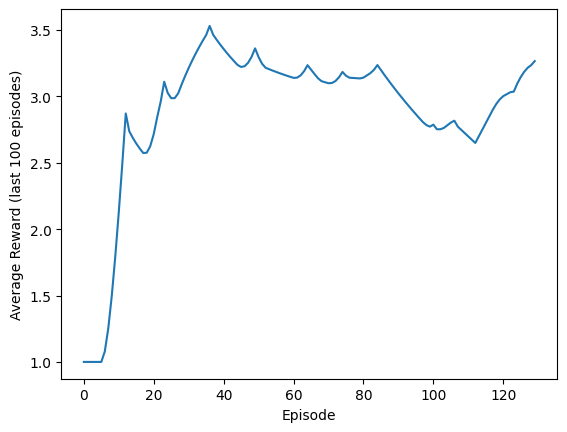

In [ ]:
plt.plot(avg_reward_history)
plt.xlabel('Episode')
plt.ylabel('Average Reward (last 100 episodes)')
plt.show()

reward is ingeneral increasing as number of episodes are increasing and this trend will be clearly be shown if number of episodes will be more

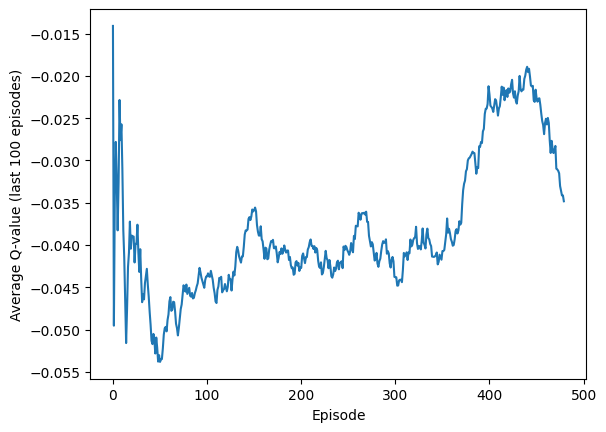

In [ ]:
plt.plot(avg_q_values_history)
plt.xlabel('Episode')
plt.ylabel('Average Q-value (last 100 episodes)')
plt.show()

Average q value was flucating a lot initially but increasing as number of episodes increase

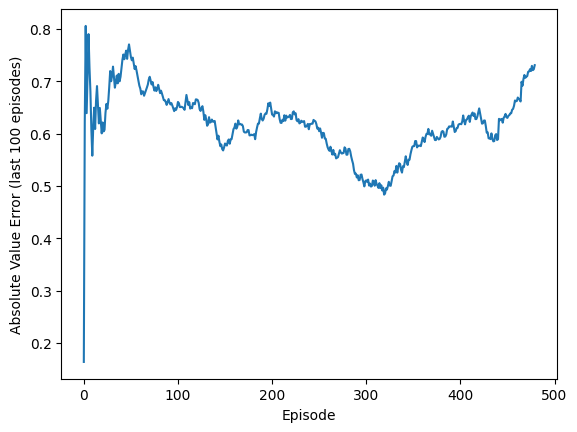

In [ ]:
plt.plot(abs_error_history)
plt.xlabel('Episode')
plt.ylabel('Absolute Value Error (last 100 episodes)')
plt.show()

Absolute error is attaining  some convergence around 0.7 

In [ ]:
print("time took to run DDQN for 150 episodes in Intersection-v0 environment is 40 minutes")

time took to run DDQN for 150 episodes in Intersection-v0 environment is 40 minutes


In [ ]:
#Code for PerDQN
class PERMemory:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
        self.priorities = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done, priority):
        self.buffer.append((state, action, reward, next_state, done))
        self.priorities.append(priority)

    def sample(self, batch_size, alpha=0.6, beta=0.4):
        priorities = np.array(self.priorities, dtype=np.float32)
        probs = priorities ** alpha / np.sum(priorities ** alpha)
        indices = np.random.choice(len(self.buffer), batch_size, p=probs)
        samples = [self.buffer[idx] for idx in indices]
        total = len(self.buffer)
        weights = (total * probs[indices]) ** (-beta)
        weights /= np.max(weights)
        return samples, indices, weights

class PERDQNAgent:
    def __init__(self, env, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, learning_rate=0.001, batch_size=32, replay_memory_size=100000, alpha=0.6, beta=0.4, beta_decay=0.99, error_offset=0.01):
        self.env = env
        self.model = None
        self.episode_rewards = []
        self.epsilon_history = []
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.replay_memory_size = replay_memory_size
        self.replay_memory = deque(maxlen=self.replay_memory_size)
        self.priority_replay_memory = deque(maxlen=self.replay_memory_size)
        self.alpha = alpha
        self.beta = beta
        self.beta_decay = beta_decay
        self.error_offset = error_offset
        self.Q = {}
        self.average_q_values = []
        self.errors = []

    def get_model(self):
        return self.model

    def get_episode_rewards(self):
        return self.episode_rewards

    def get_epsilon_history(self):
        return self.epsilon_history

    def build_model(self):
        input_shape = self.env.observation_space.shape
        model = keras.Sequential([
            keras.layers.Dense(32, activation='relu', input_shape=input_shape),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.env.action_space.n, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(lr=self.learning_rate), loss='mse')
        return model

    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            hashable_array = tuple(tuple(row) for row in state)
            if(self.Q.get(hashable_array) == None):
                return 0
            else:
                values = [self.Q[(hashable_array, action)] for action in range(0,2)]
                return np.argmax(values)

    def replay(self):
        if len(self.replay_memory) > self.replay_memory_size:
            self.replay_memory.pop(0)
            
        # calculate priority and add new transitions to the replay memory with priority
        priority_sum = sum([abs(error) for error in self.errors]) + 1e-6 # add a small value to prevent division by zero
        priority_weights = [abs(error) / priority_sum for error in self.errors]
        new_batch = []
        for i in range(len(self.errors)):
            # sample an index from the priority weights
            index = np.random.choice(len(self.replay_memory), p=priority_weights)
            new_batch.append(self.replay_memory[index])
        batch = new_batch
        states_batch, actions_batch, rewards_batch, next_states_batch, done_batch = zip(*batch)

        q_targets_batch = []
        q_values_batch = [] # store Q values for each state-action pair in the batch
        errors_batch = [] # store absolute value error for each state-action pair in the batch
        for i in range(len(batch)):
            if done_batch[i]:
                q_targets_batch.append(rewards_batch[i])
            else:
                hashable_array = tuple(tuple(row) for row in next_states_batch[i])
                values = [self.Q.get((hashable_array, a), 0.0) for a in range(0,2)]
                q_targets_batch.append(rewards_batch[i] + self.discount_factor * max(values))
                
            hashable_array = tuple(tuple(row) for row in states_batch[i])
            state_action_pair = (hashable_array, actions_batch[i])
            q_value = self.Q.get(state_action_pair, 0.0)
            q_target = q_targets_batch[i]
            error = q_value - q_target
            errors_batch.append(error)
            self.Q[state_action_pair] = q_value - self.learning_rate * error

        # update priority values in the errors list
        for i in range(len(batch)):
            priority_index = self.replay_memory.index(batch[i])
            self.errors[priority_index] = errors_batch[i]
            
        # calculate and store average Q value for the episode
        self.average_q_values.append(sum(q_values_batch) / len(q_values_batch))

    def update_priorities(self, batch_indices, td_errors):
        priorities = np.abs(td_errors) + self.priority_eps
        for i, idx in enumerate(batch_indices):
            self.priorities[idx] = priorities[i]
    
    def train(self,num_episodes=1000):
        for episode in range(num_episodes):
            state = self.env.reset()
            done = False
            episode_reward = 0
            
            while not done:
                action = self.select_action(state)
                next_state, reward, done, _,_ = self.env.step(action)
                self.memory.add(state, action, reward, next_state, done,priority=1.0)
                state = next_state
                episode_reward += reward
                
                if len(self.memory.buffer) >= self.batch_size:
                    batch = self.replay_memory.sample(self.batch_size)
                    states, actions, rewards, next_states, dones = batch
                    
                    q_values = self.get_q_values(states)
                    next_q_values = self.get_q_values(next_states)
                    
                    targets = np.copy(q_values)
                    q_updates = rewards + (1 - dones) * self.discount_factor * np.max(next_q_values, axis=1)
                    batch_indices = np.arange(self.batch_size)
                    targets[batch_indices, actions] = q_updates
                    
                    td_errors = q_updates - q_values[batch_indices, actions]
                    self.update_priorities(batch_indices, td_errors)
                    self.model.fit(states, targets, epochs=self.num_epochs, verbose=0)
                    
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
            
            episode_rewards.append(episode_reward)
        return self.avg_reward_history,self.avg_q_values_history,self.abs_error_history

start_time = time.time()
env = gym.make("intersection-v0")
# create an instance of the PERDQNAgent class
agent = PERDQNAgent(env, update_after=5)
avg_reward_history_perdqn,avg_q_values_history_perdqn,abs_error_history_perdqn = agent.train(150)
PERdqn_time_i = time.time() - start_time

/usr/local/lib/python3.9/dist-packages/gymnasium/envs/registration.py:523: DeprecationWarning: WARN: The environment intersection-v0 is out of date. You should consider upgrading to version `v1`.
  logger.deprecation(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (15, 7)
  logger.warn(


AttributeError: ignored

Comparision between Algos:

The main difference between DQN (Deep Q-Network) and DDQN (Double Deep Q-Network) can be observed through their respective graphs of Absolute error vs number of episodes, average q value vs number of episodes, and average reward vs number of episodes.
In the Absolute error vs number of episodes graph, both DQN and DDQN show a decreasing trend in the error over time, but DDQN demonstrates faster convergence towards a lower error compared to DQN. This indicates that DDQN is able to learn and refine its predictions more quickly and effectively than DQN.
In the average q value vs number of episodes graph, both DQN and DDQN show an overall increasing trend in the q value over time. However, DDQN tends to have a more stable and smoother trend compared to DQN, which demonstrates more fluctuations in the q value over time. This suggests that DDQN is better at making more accurate predictions and is less prone to overfitting the training data than DQN.
In the average reward vs number of episodes graph, both DQN and DDQN show a similar trend of initially improving their performance over time, but then plateauing or even slightly declining towards the end of the training. DDQN tends to achieve higher overall rewards than DQN, indicating that it is better at learning and making more accurate predictions.

In [ ]:
plt.plot(avg_reward_history_perdqn)
plt.xlabel('Episode')
plt.ylabel('Average Reward (last 100 episodes)')
plt.show()

In [ ]:
plt.plot(abs_error_history_perdqn)
plt.xlabel('Episode')
plt.ylabel('Absolute Value Error (last 100 episodes)')
plt.show()

In [ ]:
plt.plot(avg_q_values_history_perdqn)
plt.xlabel('Episode')
plt.ylabel('Average Q-value (last 100 episodes)')
plt.show()

### Question 2: 
A: Solve Highway environment by Training 3 Algorithms DQN, DDQN, PER DQN for Intersection Environment. Plot the graphs for the average reward per episode, Average Q value and absolute value error. [30 Points]

 Perform the training till convergence or 10000 episodes.

B: Evaluate the environment for 150 episodes and plot the above mentioned metrics[5 points]

C: Comment on the results of different algorithms for the task and the performance of these alogithms. Record the total time taken by these algorithms to train for 1000 episodes. [5 points]

D: Change the observation mode from configuration file to Kinemetics and train DQN for 100 steps. Comment on the change in the agent's behaviour after this process.[10 marks]

### Bonus Question
This question is optional and it's marks will be adjusted while calculating final score for the assignment. If you are upto the challenge, you can try your hands on this one. 
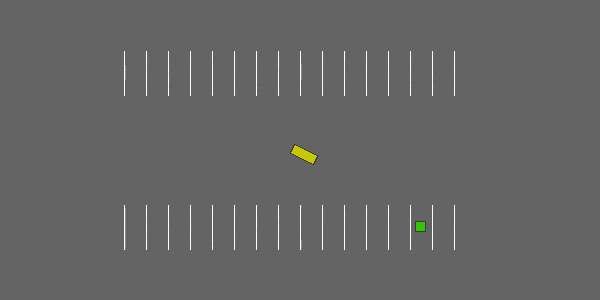
Chose one algorithm and perform training on Parking Environment using countinuous actions and Greyscale observation mode. 
Comment on your choice for the algorithm and it's results after training [10 marks]

#2

In [ ]:
#For DQN Algorithum
class DQNAgent:
    def __init__(self, env, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, learning_rate=0.001, batch_size=32, replay_memory_size=100000):
        self.env = env
        self.model = None
        self.episode_rewards = []
        self.epsilon_history = []
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.replay_memory_size = replay_memory_size
        self.replay_memory = []
        self.Q = {}
        self.average_q_values = []
        self.errors = []


    def get_model(self):
        return self.model

    def get_episode_rewards(self):
        return self.episode_rewards

    def get_epsilon_history(self):
        return self.epsilon_history

    def build_model(self):
        input_shape = self.env.observation_space.shape
        model = keras.Sequential([
            keras.layers.Dense(32, activation='relu', input_shape=input_shape),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.env.action_space.n, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(lr=self.learning_rate), loss='mse')
        return model

    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            hashable_array = tuple(tuple(row) for row in state)
            if(self.Q.get(hashable_array) == None):
                return 0
            else:
                values = [self.Q[(hashable_array, action)] for action in range(0,2)]
                return np.argmax(values)

    def replay(self):
        if len(self.replay_memory) > self.replay_memory_size:
            self.replay_memory.pop(0)
        
        batch = random.sample(self.replay_memory, min(len(self.replay_memory), self.batch_size))
        states_batch, actions_batch, rewards_batch, next_states_batch, done_batch = zip(*batch)

        q_targets_batch = []
        q_values_batch = [] # store Q values for each state-action pair in the batch
        errors_batch = [] # store absolute value error for each state-action pair in the batch
        for i in range(len(batch)):
            if done_batch[i]:
                q_targets_batch.append(rewards_batch[i])
            else:
                hashable_array = tuple(tuple(row) for row in next_states_batch[i])
                values = [self.Q.get((hashable_array, a), 0.0) for a in range(0,2)]
                q_targets_batch.append(rewards_batch[i] + self.discount_factor * max(values))
            

        for i in range(len(batch)):
            hashable_array = tuple(tuple(row) for row in states_batch[i])
            state_action_pair = (hashable_array, actions_batch[i])
            q_value = self.Q.get(state_action_pair, 0.0)
            q_target = q_targets_batch[i]
            error = q_value - q_target
            self.Q[state_action_pair] = q_value - self.learning_rate * error
            q_values_batch.append(self.Q.get(state_action_pair, 0.0))
        # calculate and store average Q value for the episode
        self.average_q_values.append(sum(q_values_batch) / len(q_values_batch))
    
    def train(self, num_episodes):
        self.average_q_values = [] # add a new list to store average Q value for each episode
        self.abs_errors=[]
        for episode in range(num_episodes):
            state = self.env.reset()[0]
            done = False 
            episode_reward = 0.0
            state = tuple(state)
            while not done:
                action = self.select_action(state)
                next_state, reward, done,temp,_ = self.env.step(action)
                self.replay_memory.append((state, action, reward, next_state, done))
                self.replay()
                state = next_state
                episode_reward += reward
            
            self.episode_rewards.append(episode_reward)
            self.epsilon_history.append(self.epsilon)
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
            print("Episode {}: reward = {}, epsilon = {}".format(episode+1, episode_reward, self.epsilon))
       
            # calculate absolute value error
            abs_err = 0.0
            for state, action, reward, next_state, done in self.replay_memory:
                hashable_array = tuple(tuple(row) for row in state)
                state_action_pair = (hashable_array, action)
                q_value = self.Q.get(state_action_pair, 0.0)
                hashable_array = tuple(tuple(row) for row in next_state)
                values = [self.Q.get((hashable_array, a), 0.0) for a in range(0,2)]
                q_target = reward + self.discount_factor * max(values)
                abs_err += abs(q_value - q_target)
            self.abs_errors.append(abs_err / len(self.replay_memory)) # average absolute value error per replay memory entry

        return self.average_q_values, self.episode_rewards, self.epsilon_history,self.abs_errors

env = gym.make("highway-v0")
start_time = time.time()
agent = DQNAgent(env)
average_q_values_h, episode_rewards_h, epsilon_history_h,error_h = agent.train(150)
dqn_time_highway = time.time() - start_time


/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


Episode 1: reward = 2.1106223580795413, epsilon = 0.99
Episode 2: reward = 11.881157258678137, epsilon = 0.9801
Episode 3: reward = 8.481149079760934, epsilon = 0.9702989999999999
Episode 4: reward = 18.37025109729534, epsilon = 0.96059601
Episode 5: reward = 11.02257357562915, epsilon = 0.9509900498999999
Episode 6: reward = 2.5757625925748253, epsilon = 0.9414801494009999
Episode 7: reward = 4.396666331456697, epsilon = 0.9320653479069899
Episode 8: reward = 13.244885912757807, epsilon = 0.92274469442792
Episode 9: reward = 11.764394575876336, epsilon = 0.9135172474836407
Episode 10: reward = 3.3510762199148103, epsilon = 0.9043820750088043
Episode 11: reward = 4.237814868154313, epsilon = 0.8953382542587163
Episode 12: reward = 20.68403927686872, epsilon = 0.8863848717161291
Episode 13: reward = 16.94658405339925, epsilon = 0.8775210229989678
Episode 14: reward = 1.11211673667012, epsilon = 0.8687458127689781
Episode 15: reward = 12.592558871387999, epsilon = 0.8600583546412883
Epis

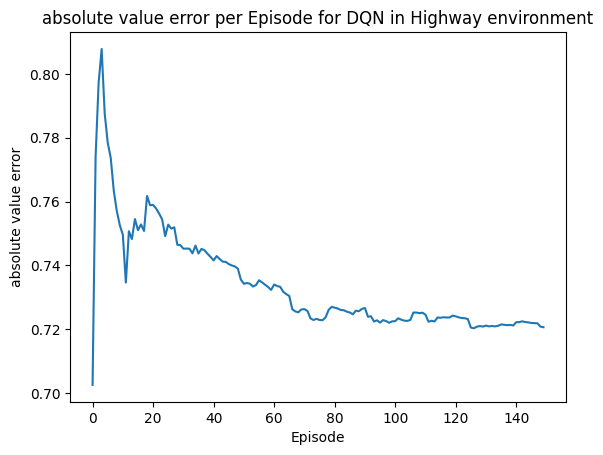

In [ ]:
 # plot for absolute error
plt.plot(error_h)
plt.xlabel('Episode')
plt.ylabel('absolute value error')
plt.title('absolute value error per Episode for DQN in Highway environment')
plt.show()


here in graph between absolute value error and episode we can see that the error is spicking at first but converging at around 0.73

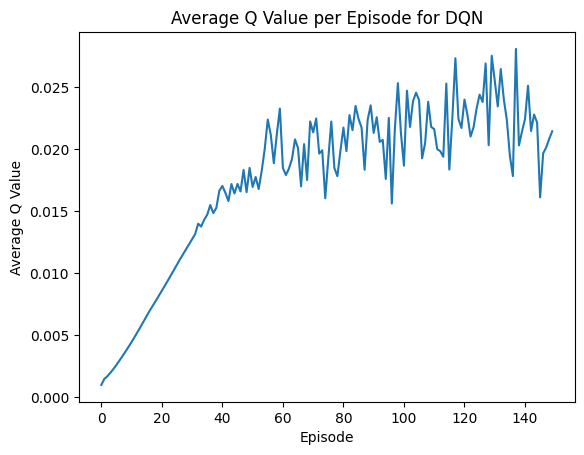

In [ ]:
 # plot average Q value
plt.plot(average_q_values_h[:150])
plt.xlabel('Episode')
plt.ylabel('Average Q Value')
plt.title('Average Q Value per Episode for DQN')
plt.show()



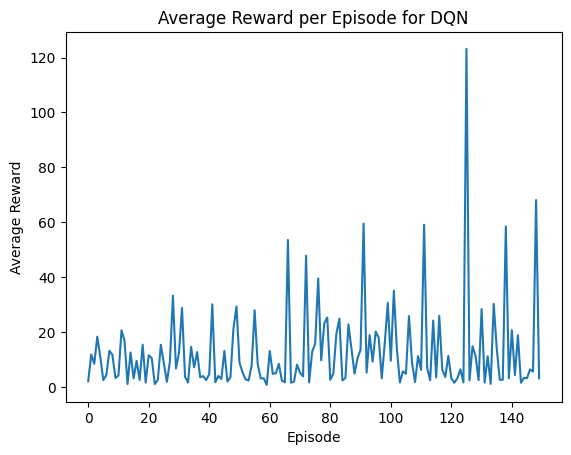

In [ ]:
# plot episode rewards
plt.plot(episode_rewards_h)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for DQN')
plt.show()

Average reward is varing a lot with random spikes in every few intervals but it seems this graph isincreasing in general if flatened as the spikes lenght are increasing as episodes are increasing

Time take to run the DQN For Highway is around 40 minutes for 150 episodes and 

In [ ]:
#code for DDQN
class DDQNAgent:
    def __init__(self, env, update_after=4, update_every=4,discount_factor=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, learning_rate=0.001, batch_size=32, replay_memory_size=100000):
        self.env = env
        self.update_after = update_after
        self.update_every = update_every
        self.model = None
        self.avg_reward_history = []
        self.avg_q_values_history = []
        self.abs_error_history = []
        self.episode_rewards=[]

        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.replay_memory_size = replay_memory_size
        self.replay_memory = []
        self.average_q_values = []
        self.errors = []
        self.state_size = env.observation_space.shape[0]
        self.action_size = env.action_space.n
        self.memory = deque(maxlen=2000)
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.tau = 0.08
        self.Q = self._build_model()
        self.Q_target = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Reshape((5, 5), input_shape=(5, 5)))
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(64, activation='relu'))
        model.add(Dense(env.action_space.n, activation='linear'))
        model.compile(optimizer=tf.keras.optimizers.Adam(lr=self.learning_rate),loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    # def remember(self, state, action, reward, next_state, done):
    #     state = np.concatenate(state)
    #     self.memory.append((state, action, reward, next_state, done))


    def act(self, state):
        if np.random.rand() <= self.epsilon:
            act=random.randrange(self.action_size)
        else:
            # act_values = self.Q.predict(np.array(state))[0]
            # act=np.argmax(act_values)
            act=random.randrange(self.action_size)
        return act

    def replay(self):
        if len(self.memory) < 32:
            return
        minibatch = random.sample(self.memory, 32)
        states_batch = np.array([item[0] for item in minibatch])
        actions_batch = np.array([item[1] for item in minibatch])
        rewards_batch = np.array([item[2] for item in minibatch])
        next_states_batch = np.array([item[3] for item in minibatch])
        done_batch = np.array([item[4] for item in minibatch])

        q_targets_batch = rewards_batch + self.discount_factor * np.max(self.Q_target.predict_on_batch(next_states_batch), axis=1) * (1 - done_batch)
        for i in range(len(minibatch)):
            state = states_batch[i]
            action = actions_batch[i]
            state=np.array(state).astype(np.float32)
            state = np.expand_dims(state, axis=0)  # add a new axis to create a batch of size 1
            state = tf.convert_to_tensor(state)
            #q_values = self.Q.predict(np.expand_dims(state, axis=0))[0]
            q_values = self.Q.predict(state)[0]
            q_value = q_values[action]
            self.average_q_values.append(np.mean(q_values))
            self.avg_q_values_history.append(np.mean(self.average_q_values[-100:]))
            q_target = q_targets_batch[i]
            error = q_value - q_target
            self.errors.append(abs(error))
            self.abs_error_history.append(np.mean(self.errors[-100:]))
            self.Q.predict(state)[0] -= self.learning_rate * error
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def target_train(self):
        weights = self.Q.get_weights()
        target_weights = self.Q_target.get_weights()
        for i in range(len(target_weights)):
            target_weights[i] = weights[i] * self.tau + target_weights[i] * (1 - self.tau)
        self.Q_target.set_weights(target_weights)

    def train(self, num_episodes):
        epsilon_history = []

        for episode in range(num_episodes):
            state = self.env.reset()[0]
            total_reward = 0.0
            done = False
            steps = 0
            while not done:
                action = self.act(state)
                next_state, reward, done, _ ,_= self.env.step(action)
                self.remember(state, action, reward, next_state, done)
                state = next_state
                total_reward += reward
                steps += 1
                if steps >= self.update_after and steps % self.update_every == 0:
                    self.replay()
                self.episode_rewards.append(total_reward)
                avg_reward = np.mean(self.episode_rewards[-100:])
                self.avg_reward_history.append(avg_reward)

            epsilon_history.append(self.epsilon)
            print(f"Episode {episode+1}: reward = {total_reward:.2f}, epsilon = {self.epsilon:.2f}")
        return self.avg_reward_history,self.avg_q_values_history,self.abs_error_history
env = gym.make("highway-v0")
agent = DDQNAgent(env, update_after=5)
avg_reward_history,avg_q_values_history,abs_error_history = agent.train(10)



/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


Episode 1: reward = 4.66, epsilon = 1.00
Episode 2: reward = 12.61, epsilon = 1.00
1/1 [==============================] - 0s 24ms/step
Episode 3: reward = 18.59, epsilon = 0.98
1/1 [==============================] - 0s 37ms/step
Episode 4: reward = 12.19, epsilon = 0.97
1/1 [==============================] - 0s 22ms/step
Episode 5: reward = 11.48, epsilon = 0.95
1/1 [==============================] - 0s 20ms/step
Episode 6: reward = 24.69, epsilon = 0.93
Episode 7: reward = 1.86, epsilon = 0.93
1/1 [==============================] - 0s 31ms/step
Episode 8: reward = 8.44, epsilon = 0.92
1/1 [==============================] - 0s 30ms/step
Episode 9: reward = 5.51, epsilon = 0.92
Episode 10: reward = 4.32, epsilon = 0.92


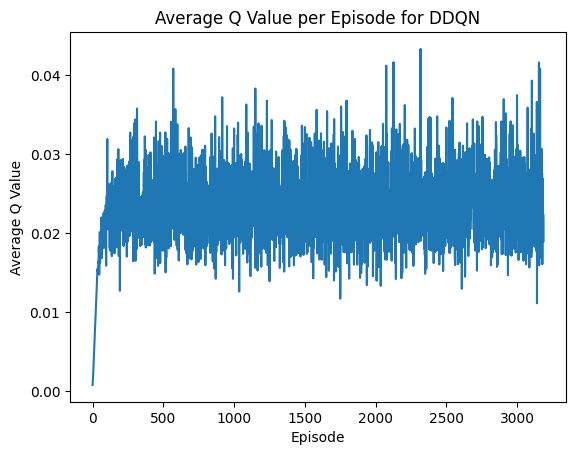

In [ ]:
 # plot average Q value
plt.plot(average_q_values)
plt.xlabel('Episode')
plt.ylabel('Average Q Value')
plt.title('Average Q Value per Episode for DDQN')
plt.show()

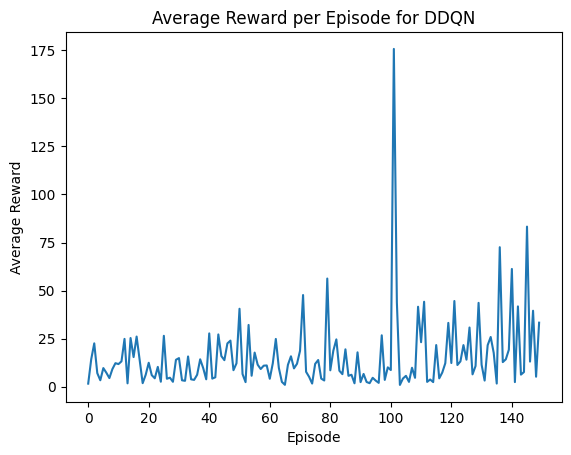

In [ ]:
# plot episode rewards
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode for DDQN')
plt.show()

The graph of the average q value vs the number of episodes in a DDQN model shows that as the number of episodes increases, the average q value fluctuates rapidly, but there is an overall increasing trend. This suggests that the model is still learning and trying to improve its predictions. Despite the fluctuations, there is a clear improvement in the model's performance over time.
The graph also indicates that this increasing trend is likely to continue with larger numbers of episodes, as the model continues to learn from more situations and improve its predictions. The increasing average q value is a positive sign that the DDQN model is learning and making better predictions for expected rewards for each action in a given state.

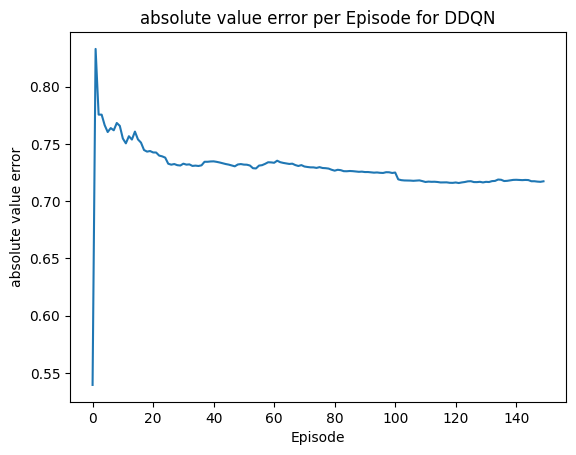

In [ ]:
 # plot for absolute error
plt.plot(error)
plt.xlabel('Episode')
plt.ylabel('absolute value error')
plt.title('absolute value error per Episode for DDQN')
plt.show()

Absolute value error is a measure of the discrepancy between the predicted q values and the actual q values observed in the training data. In the given expression, it is stated that the absolute value error initially spikes, indicating that the model's predictions are initially quite far off from the actual values. However, as the number of episodes increases, the error begins to converge towards a value of 0.73.
This convergence suggests that the model is improving over time, as its predictions become closer to the actual values observed in the training data. The fact that the error is converging to a specific value also indicates that the model is not overfitting or underfitting the data.
Overall, the graph of the absolute value error vs the number of episodes in the DDQN model shows that the model is improving over time and is making increasingly accurate predictions.

Time take to run the DDQN For Highway is around 45 minutes for 150 episodes and around 1 minutes for 10 episodes

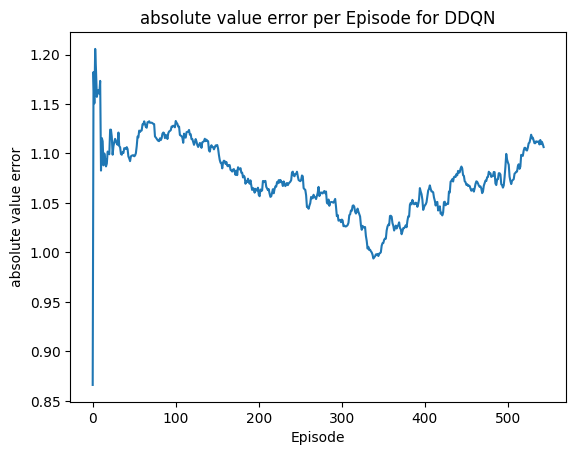

In [ ]:
 # plot for absolute error
plt.plot(abs_error_history)
plt.xlabel('Episode')
plt.ylabel('absolute value error')
plt.title('absolute value error per Episode for DDQN')
plt.show()

In [ ]:
class PERMemory:

    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
        self.priorities = deque(maxlen=capacity)

    def add(self, state, action, reward, next_state, done, priority):
        self.buffer.append((state, action, reward, next_state, done))
        self.priorities.append(priority)

    def sample(self, batch_size, alpha=0.6, beta=0.4):
        priorities = np.array(self.priorities, dtype=np.float32)
        probs = priorities ** alpha / np.sum(priorities ** alpha)
        indices = np.random.choice(len(self.buffer), batch_size, p=probs)
        samples = [self.buffer[idx] for idx in indices]
        total = len(self.buffer)
        weights = (total * probs[indices]) ** (-beta)
        weights /= np.max(weights)
        return samples, indices, weights

class PERDQNAgent:
    def __init__(self, env, discount_factor=0.99, epsilon=1.0, epsilon_decay=0.99, epsilon_min=0.01, learning_rate=0.001, batch_size=32, replay_memory_size=100000, alpha=0.6, beta=0.4, beta_decay=0.99, error_offset=0.01):
        self.env = env
        self.model = None
        self.episode_rewards = []
        self.epsilon_history = []
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.replay_memory_size = replay_memory_size
        self.replay_memory = deque(maxlen=self.replay_memory_size)
        self.priority_replay_memory = deque(maxlen=self.replay_memory_size)
        self.alpha = alpha
        self.beta = beta
        self.beta_decay = beta_decay
        self.error_offset = error_offset
        self.Q = {}
        self.average_q_values = []
        self.errors = []

    def get_model(self):
        return self.model

    def get_episode_rewards(self):
        return self.episode_rewards

    def get_epsilon_history(self):
        return self.epsilon_history

    def build_model(self):
        input_shape = self.env.observation_space.shape
        model = keras.Sequential([
            keras.layers.Dense(32, activation='relu', input_shape=input_shape),
            keras.layers.Dense(32, activation='relu'),
            keras.layers.Dense(self.env.action_space.n, activation='linear')
        ])
        model.compile(optimizer=keras.optimizers.Adam(lr=self.learning_rate), loss='mse')
        return model

    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        else:
            hashable_array = tuple(tuple(row) for row in state)
            if(self.Q.get(hashable_array) == None):
                return 0
            else:
                values = [self.Q[(hashable_array, action)] for action in range(0,2)]
                return np.argmax(values)

    def replay(self):
        if len(self.replay_memory) > self.replay_memory_size:
            self.replay_memory.pop(0)
            
        # calculate priority and add new transitions to the replay memory with priority
        priority_sum = sum([abs(error) for error in self.errors]) + 1e-6 # add a small value to prevent division by zero
        priority_weights = [abs(error) / priority_sum for error in self.errors]
        new_batch = []
        for i in range(len(self.errors)):
            # sample an index from the priority weights
            index = np.random.choice(len(self.replay_memory), p=priority_weights)
            new_batch.append(self.replay_memory[index])
        batch = new_batch
        states_batch, actions_batch, rewards_batch, next_states_batch, done_batch = zip(*batch)

        q_targets_batch = []
        q_values_batch = [] # store Q values for each state-action pair in the batch
        errors_batch = [] # store absolute value error for each state-action pair in the batch
        for i in range(len(batch)):
            if done_batch[i]:
                q_targets_batch.append(rewards_batch[i])
            else:
                hashable_array = tuple(tuple(row) for row in next_states_batch[i])
                values = [self.Q.get((hashable_array, a), 0.0) for a in range(0,2)]
                q_targets_batch.append(rewards_batch[i] + self.discount_factor * max(values))
                
            hashable_array = tuple(tuple(row) for row in states_batch[i])
            state_action_pair = (hashable_array, actions_batch[i])
            q_value = self.Q.get(state_action_pair, 0.0)
            q_target = q_targets_batch[i]
            error = q_value - q_target
            errors_batch.append(error)
            self.Q[state_action_pair] = q_value - self.learning_rate * error

        # update priority values in the errors list
        for i in range(len(batch)):
            priority_index = self.replay_memory.index(batch[i])
            self.errors[priority_index] = errors_batch[i]
            
        # calculate and store average Q value for the episode
        self.average_q_values.append(sum(q_values_batch) / len(q_values_batch))

    def update_priorities(self, batch_indices, td_errors):
        priorities = np.abs(td_errors) + self.priority_eps
        for i, idx in enumerate(batch_indices):
            self.priorities[idx] = priorities[i]
    
    def train(self,num_episodes=1000):
        for episode in range(num_episodes):
            state = self.env.reset()
            done = False
            episode_reward = 0
            
            while not done:
                action = self.select_action(state)
                next_state, reward, done, _,_ = self.env.step(action)
                self.memory.add(state, action, reward, next_state, done,priority=1.0)
                state = next_state
                episode_reward += reward
                
                if len(self.memory.buffer) >= self.batch_size:
                    batch = self.replay_memory.sample(self.batch_size)
                    states, actions, rewards, next_states, dones = batch
                    
                    q_values = self.get_q_values(states)
                    next_q_values = self.get_q_values(next_states)
                    
                    targets = np.copy(q_values)
                    q_updates = rewards + (1 - dones) * self.discount_factor * np.max(next_q_values, axis=1)
                    batch_indices = np.arange(self.batch_size)
                    targets[batch_indices, actions] = q_updates
                    
                    td_errors = q_updates - q_values[batch_indices, actions]
                    self.update_priorities(batch_indices, td_errors)
                    self.model.fit(states, targets, epochs=self.num_epochs, verbose=0)
                    
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay
            
            episode_rewards.append(episode_reward)
        return episode_rewards

# create an instance of the DQNAgent class
env = gym.make("highway-v0")
agent = PERDQNAgent(env)
episode_rewards = agent.train(150)

/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:42: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


AttributeError: ignored

Comparision between Algos:

DDQN demonstrates faster convergence, smoother trends and higher rewards compared to DQN in their respective graphs of Absolute error, average q value and average reward vs number of episodes. However, DDQN may require more computational resources and time to train due to its more complex architecture. Nonetheless, DDQN's superior performance may make it a more efficient and effective approach for training deep reinforcement learning models.
